# FIRST TRIAL PREDICTION USING MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from PIL import Image

import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
print("Version: ", tf.__version__) # Check tf version
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE") # Check GPU status
physical_devices = tf.config.experimental.list_physical_devices('GPU') # Config GPU
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Version:  2.2.0
GPU is available


In [2]:
def rescale(image, pixel_h = 128, pixel_w = 128):
    """
    rescales images
    param: image source
    return: rescaled image
    """
    return image.resize((pixel_h, pixel_w))
    

ROTATIONS = [90, 180, 270]
def random_rotation(image):
    """
    randomly rotates the image while preserving the label
    param: image source
    return: rotated image (will not be the same as the original)
    """
    return image.rotate(choice(ROTATIONS))

def _horizontal_flip(image):
    """
    flips image horizontally
    param: image source
    return: horizontal flipped image
    """
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def _vertical_flip(image):
    """
    flips image vertically
    param: image source
    return: vertical flipped image
    """
    return image.transpose(Image.FLIP_TOP_BOTTOM)

CHOICE = [True, False]
def flipper(image):
    """
    randomly flips image
    param: image source
    return: flipped (or not) image
    """
    flip_h = choice(CHOICE)
    print(flip_h)
    flip_v = choice(CHOICE)
    print(flip_v)
    if flip_h:
        image = _horizontal_flip(image)
    if flip_v:
        image = _vertical_flip(image)
    return image

def cropping(image, left, top, right, bottom):
    """
    crops image
    param: image source
    return: cropped image
    """
    return image.crop((left, top, right, bottom))

In [3]:
path = r"C:\Users\Darryl See\Desktop\ConvoNN\Gender Classification\Gender-Classification-Project\image.png"
img = Image.open(path)
img_rescaled = rescale(img)
img_array = np.asarray(img_rescaled)
img_normalized = img_array/255.0
img_nparray = np.asarray(img_normalized).astype('float16')
img_dim = np.expand_dims(img_nparray, axis= 0)
img_dim.shape

(1, 128, 128, 3)

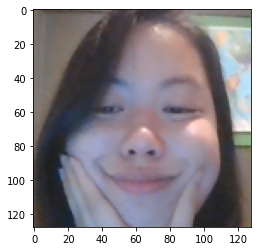

In [4]:
plt.imshow(img_array)

In [5]:
model = models.load_model('model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

In [6]:
prediction = model.predict(img_dim)

In [7]:
print(np.argmax(prediction[0]))

0


In [8]:
prediction[0]

array([9.9947387e-01, 5.2611314e-04], dtype=float32)